# **Red Wine Quality Prediction**

# Problem Statement:


This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

# Attribute Information

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'. This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

We need to build a classification model.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('winequality-red.csv')

In [ ]:
print("Rows , Columns:" + str(df.shape))
df.head()

Rows , Columns:(1599, 12)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# **Statsical Summary**

In [ ]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

# Comment -

# Mean feature values as per different quality grade

In [ ]:
means = pd.pivot_table(data=df, index='quality',aggfunc={'fixed acidity':np.mean, 'volatile acidity':np.mean, 'citric acid':np.mean,
                                                     'residual sugar':np.mean,'chlorides':np.mean,
                                                     'free sulfur dioxide':np.mean,'density':np.mean,'pH':np.mean,'sulphates':np.mean,'alcohol':np.mean})
means

alcohol  chlorides  citric acid   density  fixed acidity  \
quality                                                               
3         9.955000   0.122500     0.171000  0.997464       8.360000   
4        10.265094   0.090679     0.174151  0.996542       7.779245   
5         9.899706   0.092736     0.243686  0.997104       8.167254   
6        10.629519   0.084956     0.273824  0.996615       8.347179   
7        11.465913   0.076588     0.375176  0.996104       8.872362   
8        12.094444   0.068444     0.391111  0.995212       8.566667   

         free sulfur dioxide        pH  residual sugar  sulphates  \
quality                                                             
3                  11.000000  3.398000        2.635000   0.570000   
4                  12.264151  3.381509        2.694340   0.596415   
5                  16.983847  3.304949        2.528855   0.620969   
6                  15.711599  3.318072        2.477194   0.675329   
7                  14.045226  3.290754        2.720603   0.741256   
8                  13.277778  3.267222        2.577778   0.767778   

         volatile acidity  
quality                    
3                0.884500  
4                0.693962  
5                0.577041  
6                0.497484  
7                0.403920  
8                0.423333

**Comment**-

based on mean value quality
Good quality (grade 7 & 8) of wine posses higher amount of alcohol, citric acid, fixed acidity, sulphates.

Good quality (grade 7 & 8) of wine posses lower amount of Chlorides, low pH value,volatile acidity.

Good quality (grade 7 & 8) of wine posses moderate amount of free sulfur dioxide in range of 14-16.

Density and residual sugar are not deciding factor in determining quality of wine.


**Create Classification version of target variable**

We will create two class for purpose of classification based on quality grade of red wine

class 1- Good quality red wine - if a quality grade of 7 or higher

class 2- Low quality red wine - if a quality grade less than 7

In [ ]:
df['class'] = [1 if x >= 7 else 0 for x in df['quality']]

In [ ]:
df['class'].value_counts()

class
0    1382
1     217
Name: count, dtype: int64

In [ ]:
df1 = df.drop(columns = 'quality')

# Mean feature values based on class

In [ ]:
means = pd.pivot_table(data = df , index = 'class' , aggfunc = {'fixed acidity': np.mean, 'volatile acidity': np.mean, 'citric acid' : np.mean,
                      'residual sugar' : np.mean, 'chlorides' : np.mean, 'free sulfur dioxide' : np.mean, 'density': np.mean, 'pH': np.mean,
                        'sulphates' : np.mean, 'alcohol': np.mean})

In [ ]:
means

alcohol  chlorides  citric acid   density  fixed acidity  \
class                                                               
0      10.251037   0.089281     0.254407  0.996859       8.236831   
1      11.518049   0.075912     0.376498  0.996030       8.847005   

       free sulfur dioxide        pH  residual sugar  sulphates  \
class                                                             
0                16.172214  3.314616        2.512120   0.644754   
1                13.981567  3.288802        2.708756   0.743456   

       volatile acidity  
class                    
0              0.547022  
1              0.405530

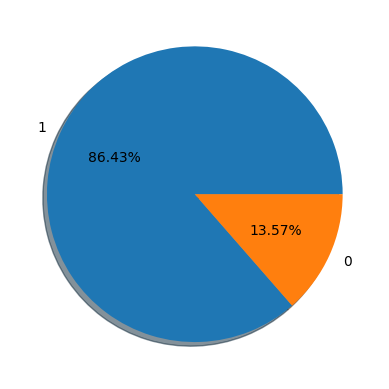

In [ ]:
labels = '1' , '0',
fig , ax = plt.subplots()
ax.pie(df['class'].value_counts(), labels = labels, radius =1 , autopct = '%1.2f%%' , shadow = True)
plt.show()

# Checking null value or missing data

<Axes: >

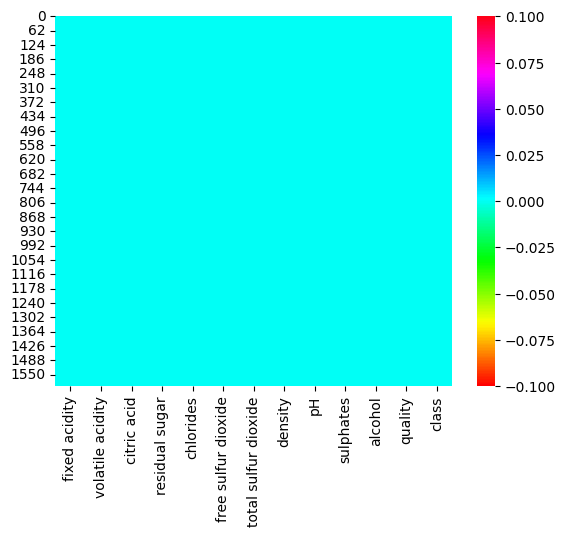

In [ ]:
sns.heatmap(df.isnull(), cmap = 'hsv')

In [ ]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values / len(df))*100
print(pd.concat([missing_values , percentage_missing_values] , axis =1 , keys = ['Missing Values' , '% Missing Data']))

                      Missing Values  % Missing Data
fixed acidity                      0             0.0
volatile acidity                   0             0.0
citric acid                        0             0.0
residual sugar                     0             0.0
chlorides                          0             0.0
free sulfur dioxide                0             0.0
total sulfur dioxide               0             0.0
density                            0             0.0
pH                                 0             0.0
sulphates                          0             0.0
alcohol                            0             0.0
quality                            0             0.0
class                              0             0.0


# Exploratory Data Analysis

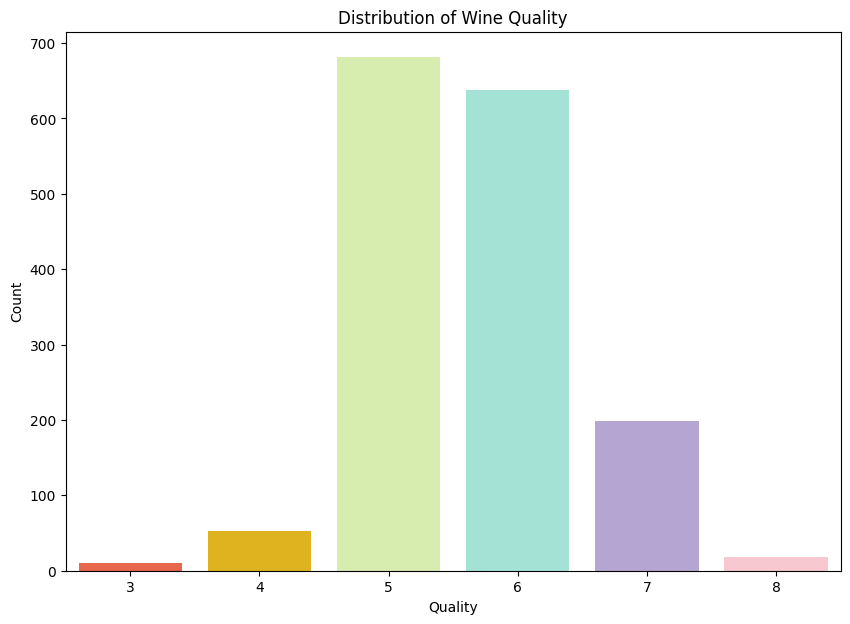

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
custom_colors = ['#FF5733', '#FFC300', '#DAF7A6', '#9AECDB', '#B39DDB', '#FFC0CB', '#900C3F']

plt.figure(figsize=(10, 7))
sns.countplot(x='quality', data=df, palette=custom_colors)

plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality')

plt.show()


In [ ]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

<Figure size 400x400 with 0 Axes>

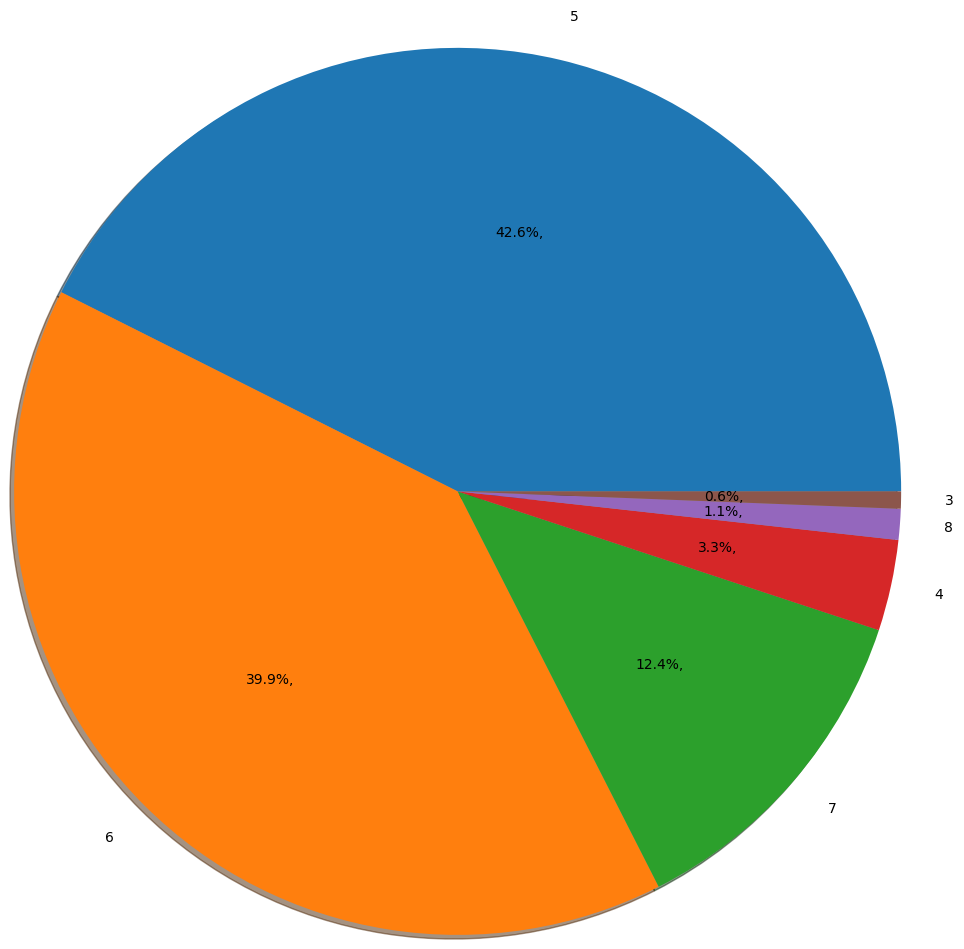

In [ ]:
plt.figure(figsize = (4, 4))
labels = '5', '6' , '7', '4' , '8' , '3'
fig , ax = plt.subplots()
ax.pie(df['quality'].value_counts() , labels = labels , radius = 3 , autopct ='%1.1f%%,' ,shadow = True)
plt.show()

Comment -

1. Majority of wine samples are of quality level 5 and 6.

2. This dataset we have only 217 wine sample with higher quality grade.

# Distribution of features :

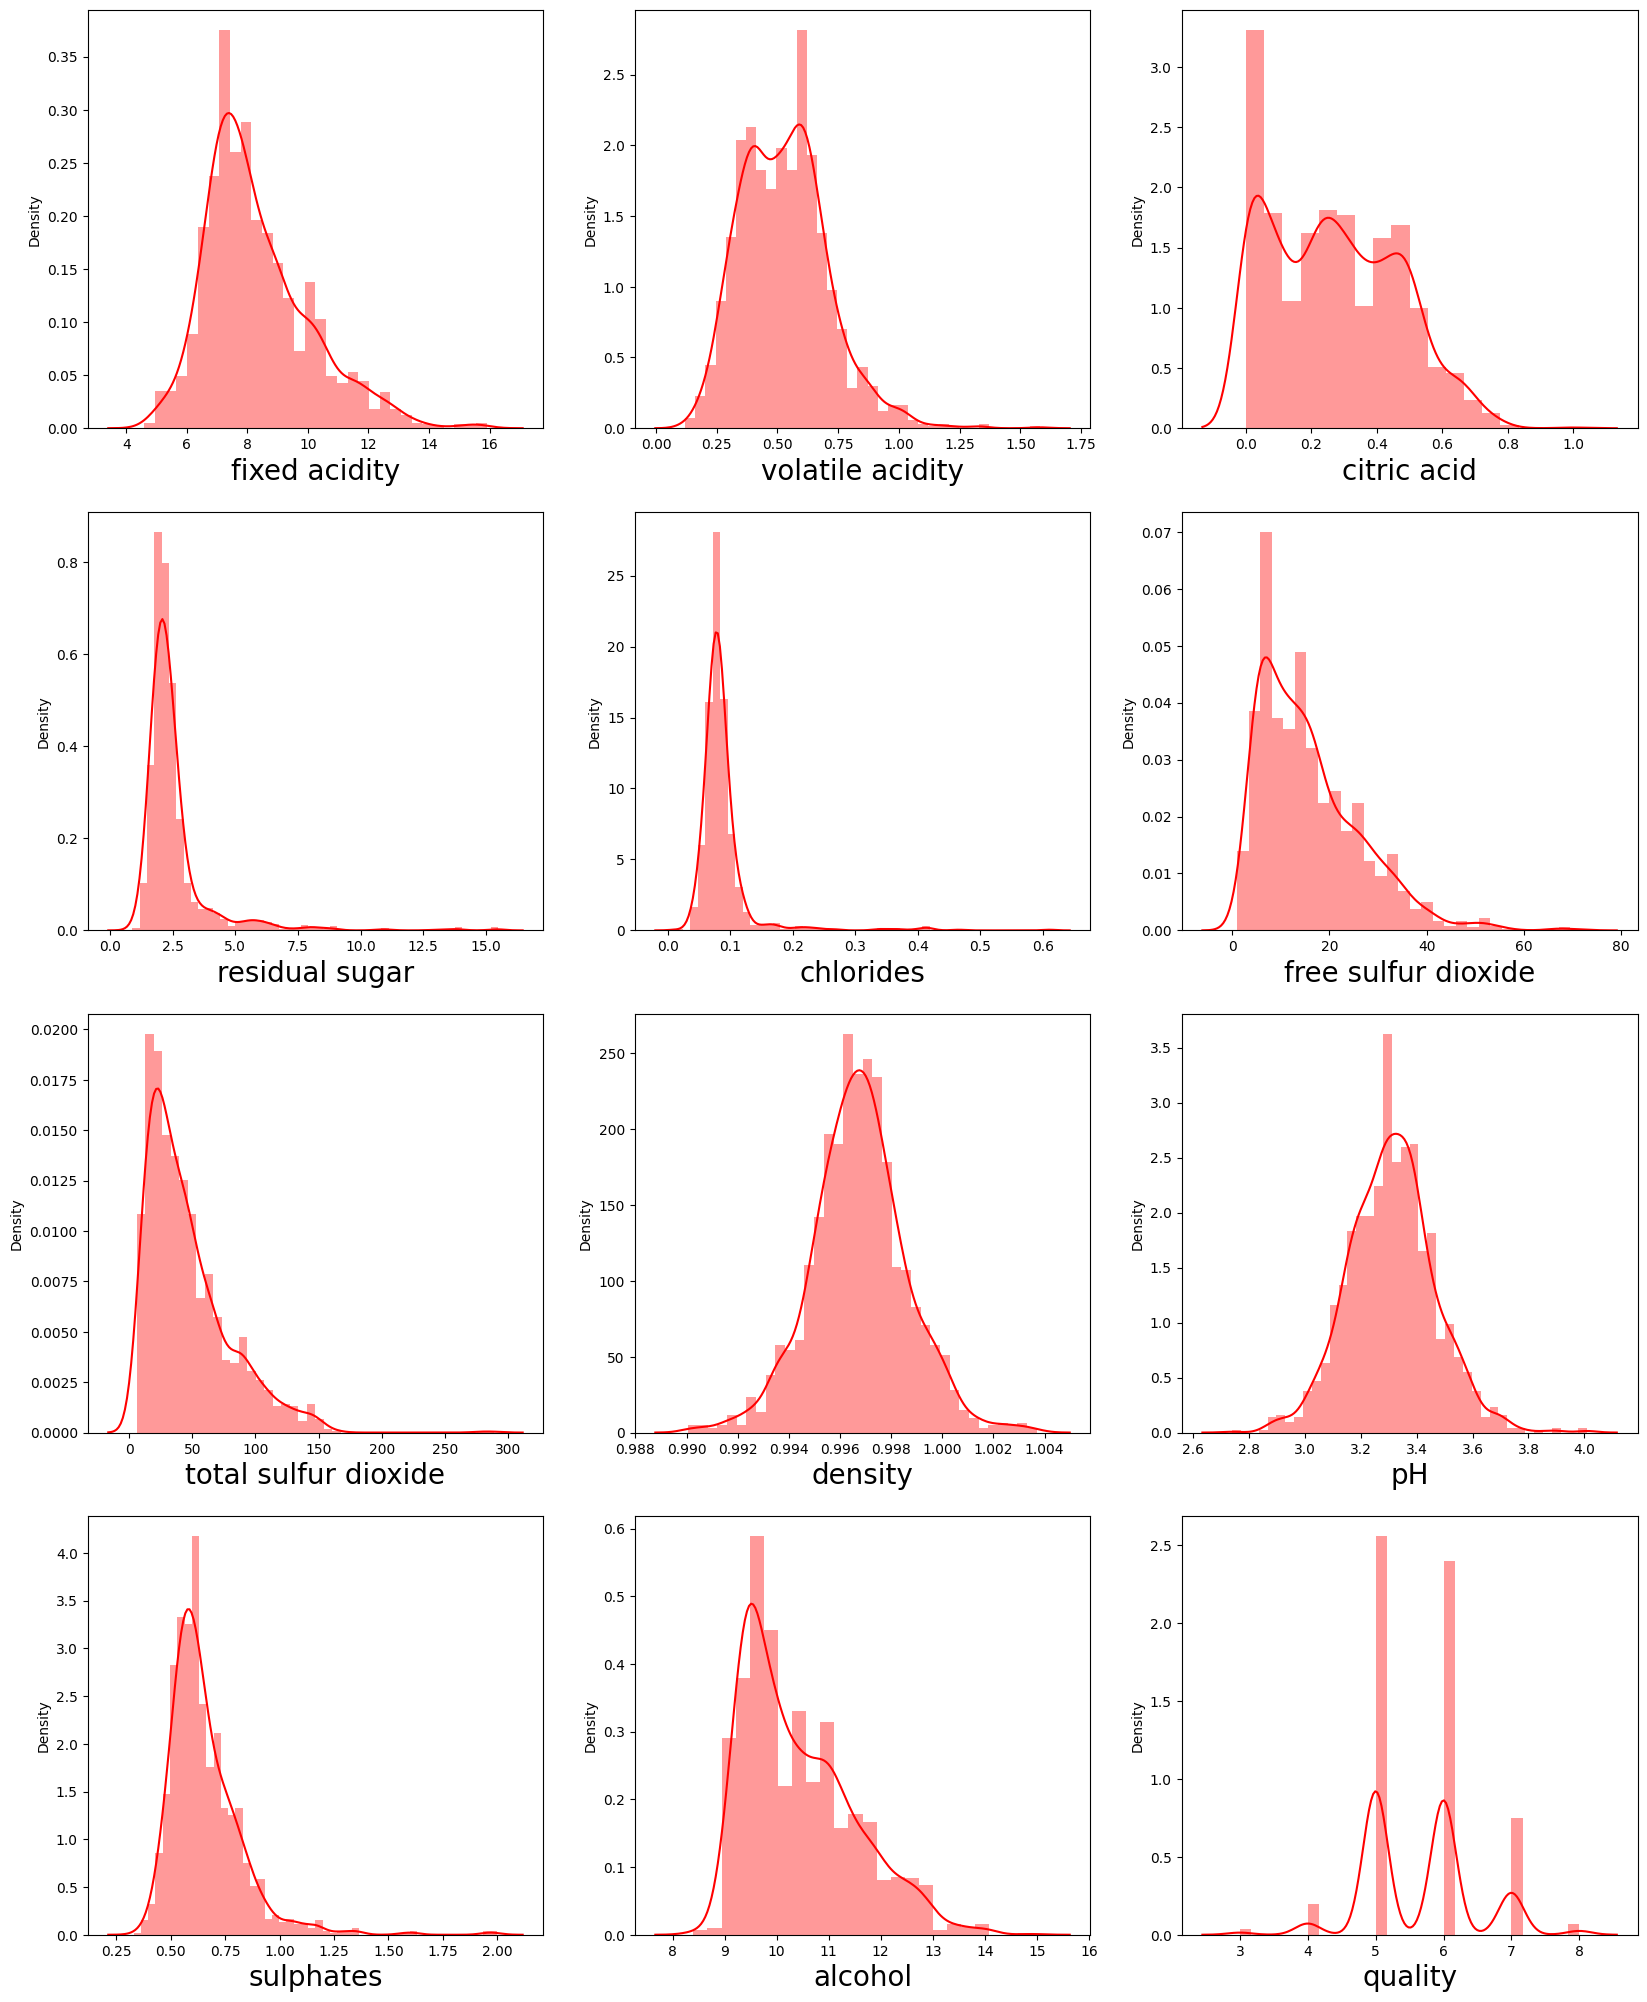

In [ ]:
plt.figure(figsize = (20 , 25) , facecolor = 'white')
plotnumber = 1
for column in df:
  if plotnumber <=12:
    ax = plt.subplot(4 ,3 ,plotnumber)
    sns.distplot(df[column] , color = 'r')
    plt.xlabel(column , fontsize = 20)
  plotnumber +=1
plt.show()

**Comment** -
There is skewness in data

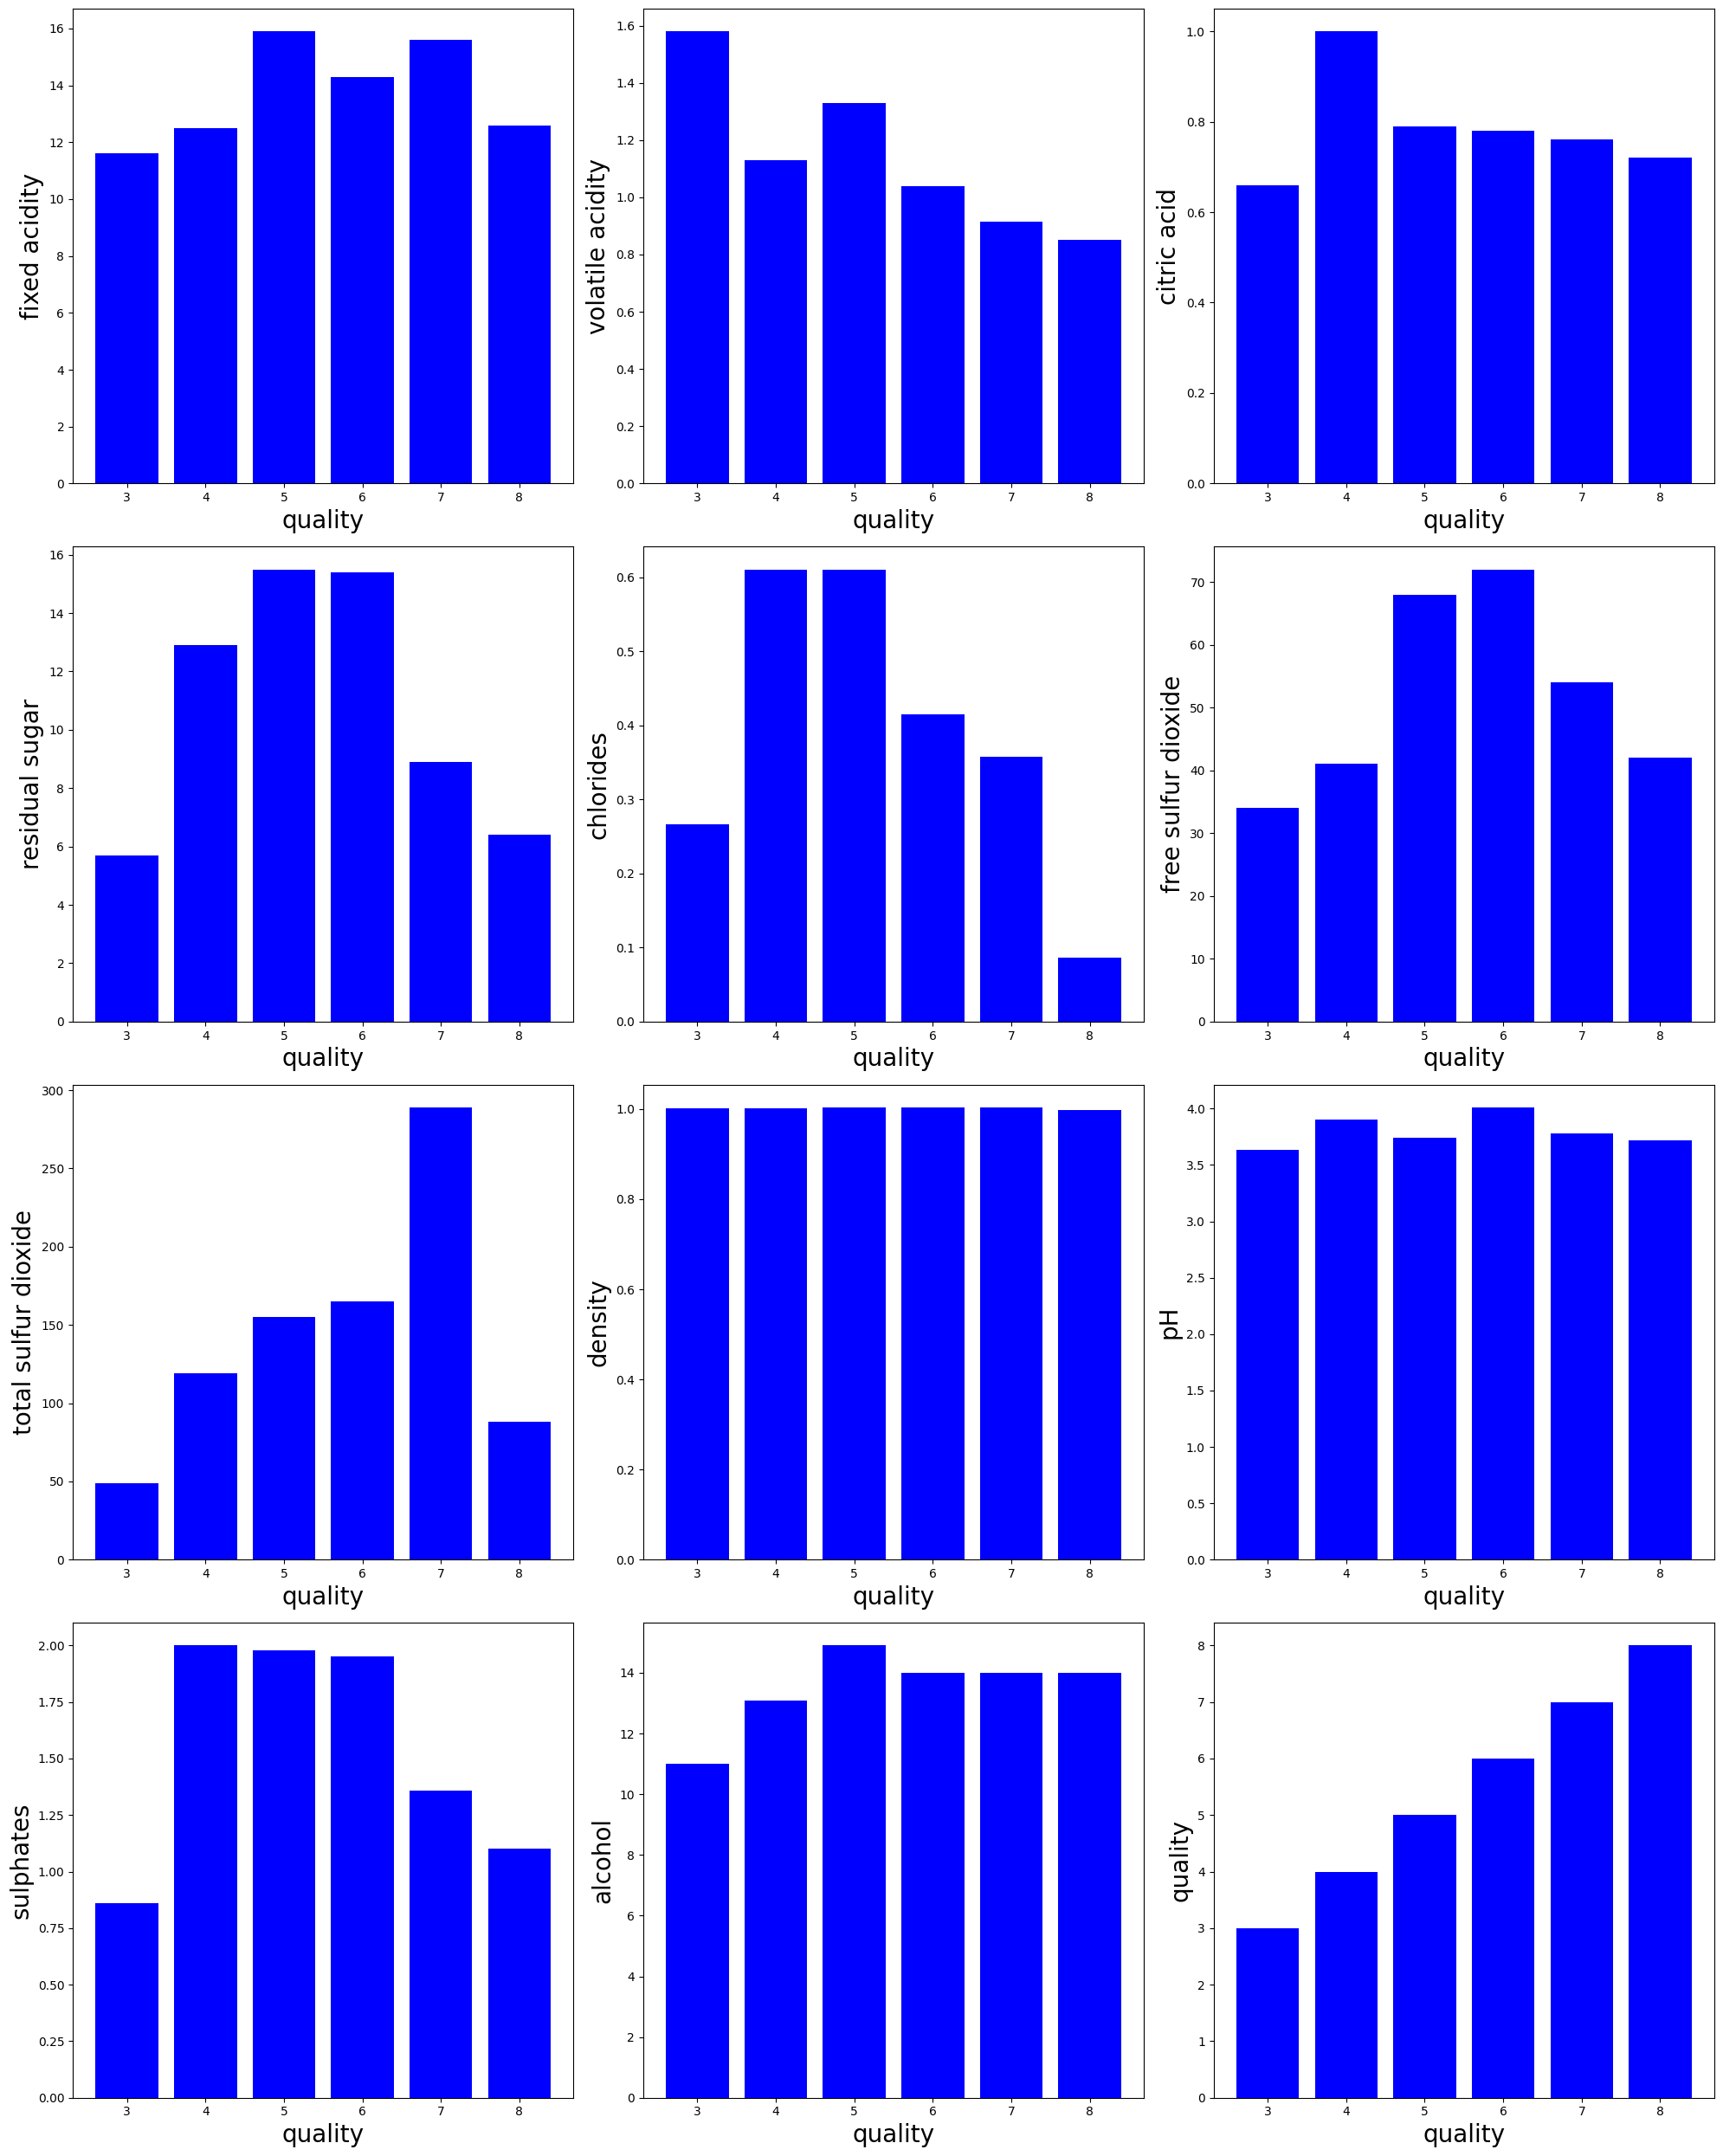

In [ ]:
plt.figure(figsize = (20 , 25) , facecolor = 'white')
plotnumber = 1
for column in df:
  if plotnumber <=12:
    ax = plt.subplot(4 ,3 ,plotnumber)
    plt.bar(df['quality'] , df[column] , color = 'b')
    plt.xlabel('quality' , fontsize = 20)
    plt.ylabel(column , fontsize = 20)
  plotnumber +=1
plt.tight_layout()
plt.show()

**Comment**-

Based on quality

1. Good quality (grade 7 & 8) of wine posses higher amount of alcohol, fixed acidity.
2. Good quality (grade 7 & 8) of wine posses lower amount of low pH value,volatile acidity.
3. Good quality (grade 7 & 8) of wine posses moderate amount of free sulfur dioxide in range of 14-16.
4. Density and residual sugar are not deciding factor in determining quality of wine.
5. Low grade quality of wine posses lower amount of total sulfer dioxide.
6. Higher volatile acid lower the quality of wine.

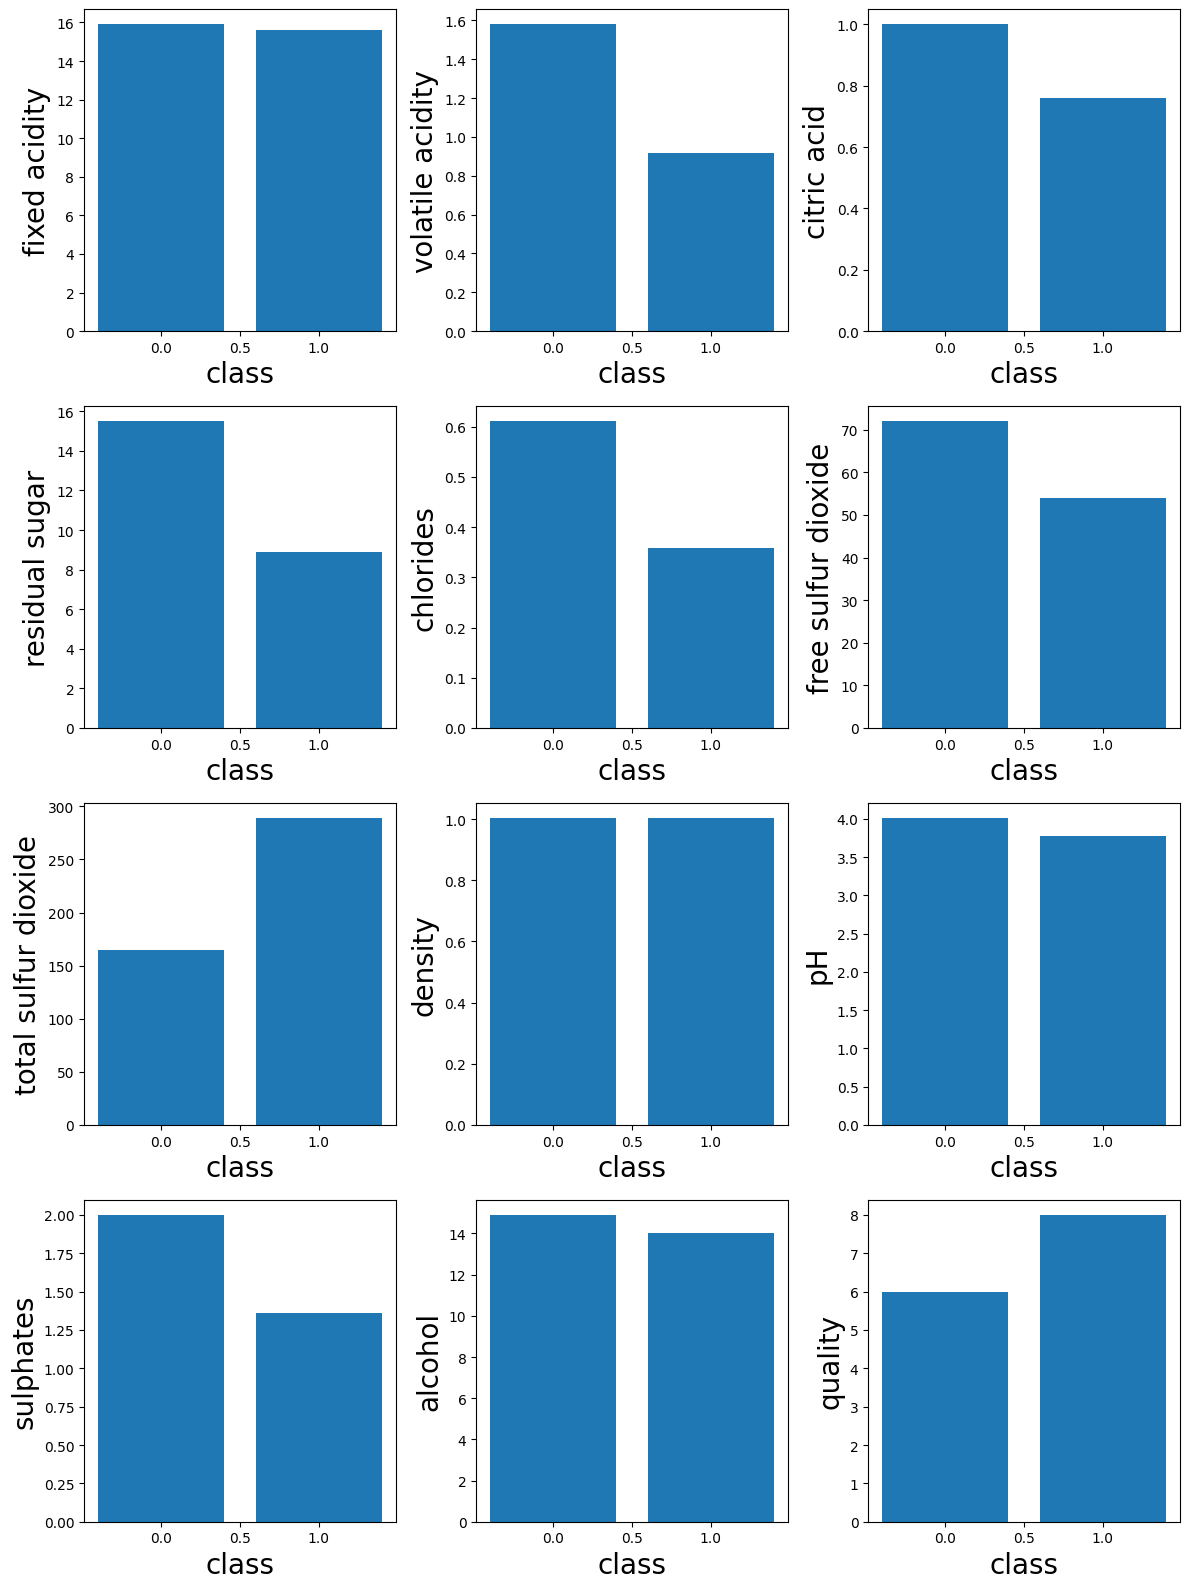

In [ ]:
plt.figure(figsize = (12 , 16) , facecolor = 'white')
plotnumber = 1
for column in df:
  if plotnumber <=12:
    ax = plt.subplot(4 ,3 ,plotnumber)
    plt.bar(df['class'] , df[column])
    plt.xlabel('class' , fontsize = 20)
    plt.ylabel(column , fontsize = 20)
  plotnumber +=1
plt.tight_layout()
plt.show()

# class 1 - good quality
# class 0 - low quality

**Comment** -

1. Quality of wine increase with increase in alcohol, sulpates, residual sugar, citric acid,fixed acidity.
2. Quality of wine decreses with increase in total sulfur dioxide,chlorides, volatile acidity,free sulfur dioxide.

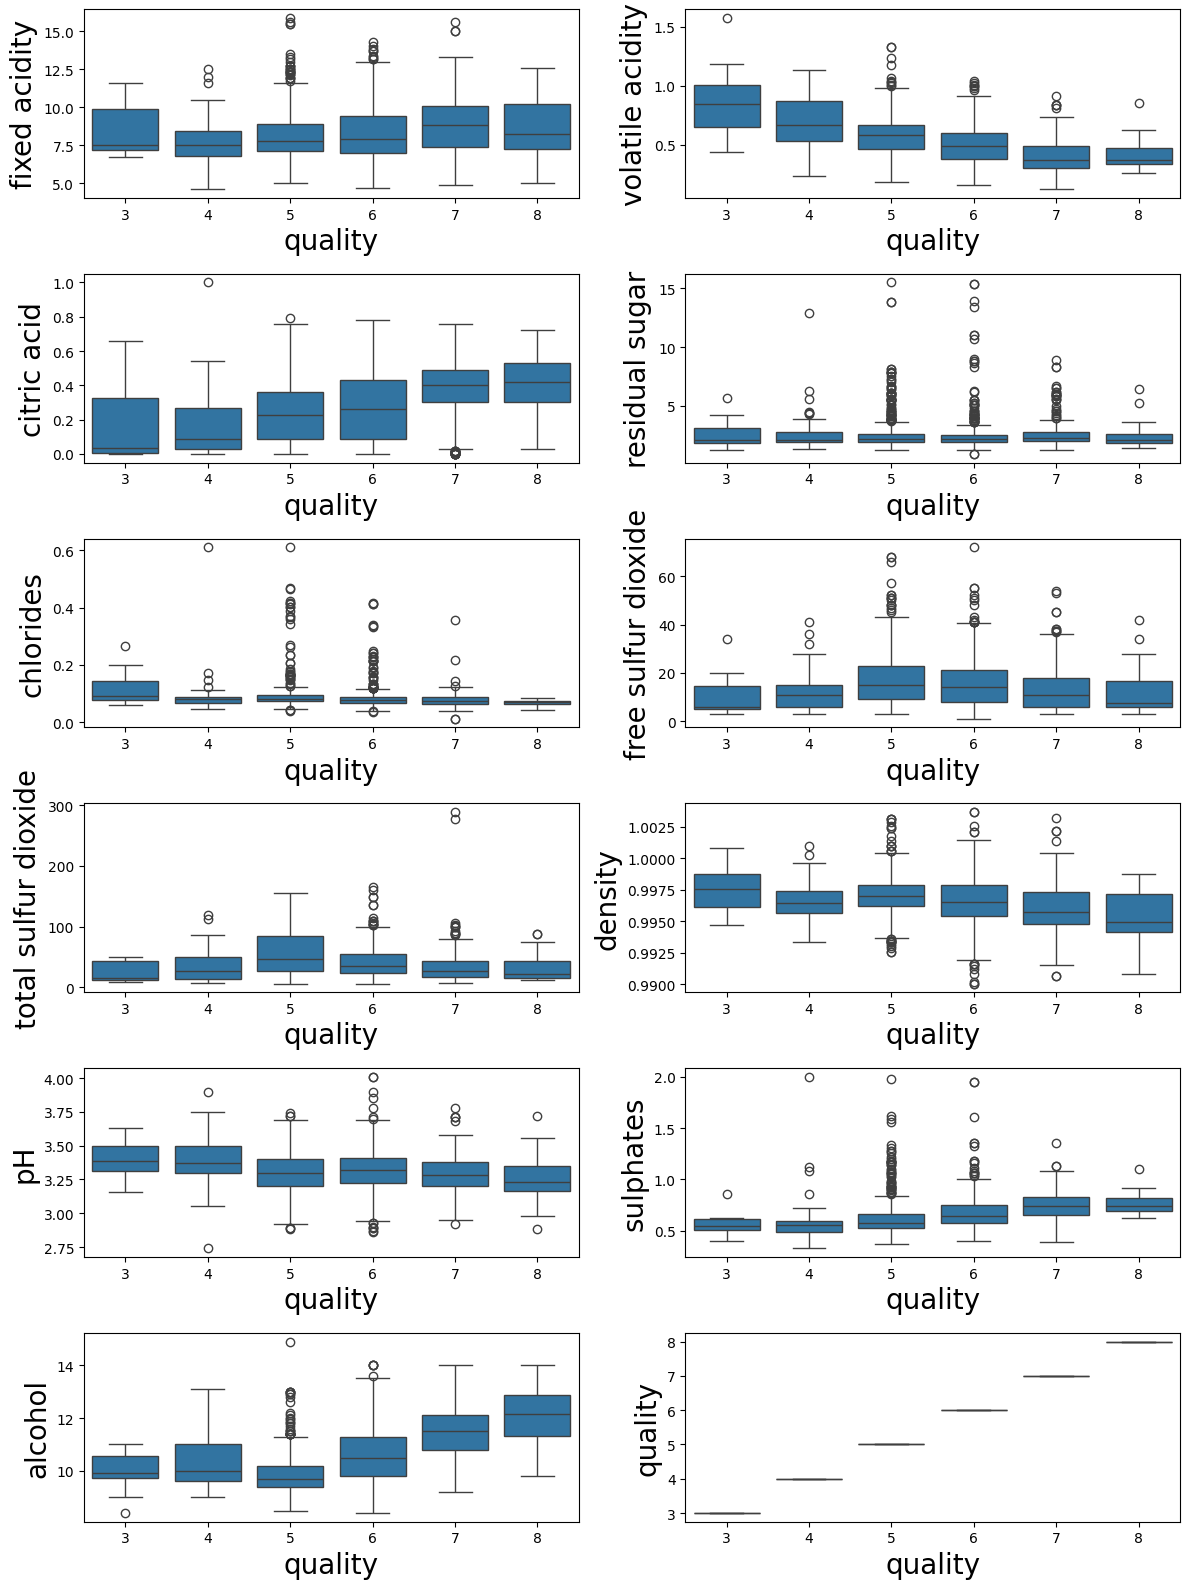

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 16), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber <= 12:
        ax = plt.subplot(6, 2, plotnumber)
        sns.boxplot(x='quality', y=column, data=df)
        plt.xlabel('quality', fontsize=20)
        plt.ylabel(column, fontsize=20)
        plotnumber += 1

plt.tight_layout()
plt.show()


In [ ]:
Grp_c = df.groupby('class')
C_1 = Grp_c.get_group(1)
C_2 = Grp_c.get_group(0)
C_1
C_2

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  class  
0         9.4        5      0  
1         9.8        5      0  
2         9.8        5      0  
3         9.8        6      0  
4         9.4        5      0  
...       ...      ...    ...  
1594     10.5        5      0  
1595     11.2        6      0  
1596     11.0        6      0  
1597     10.2        5      0  
1598     11.0        6      0  

[1382 rows x 13 columns]

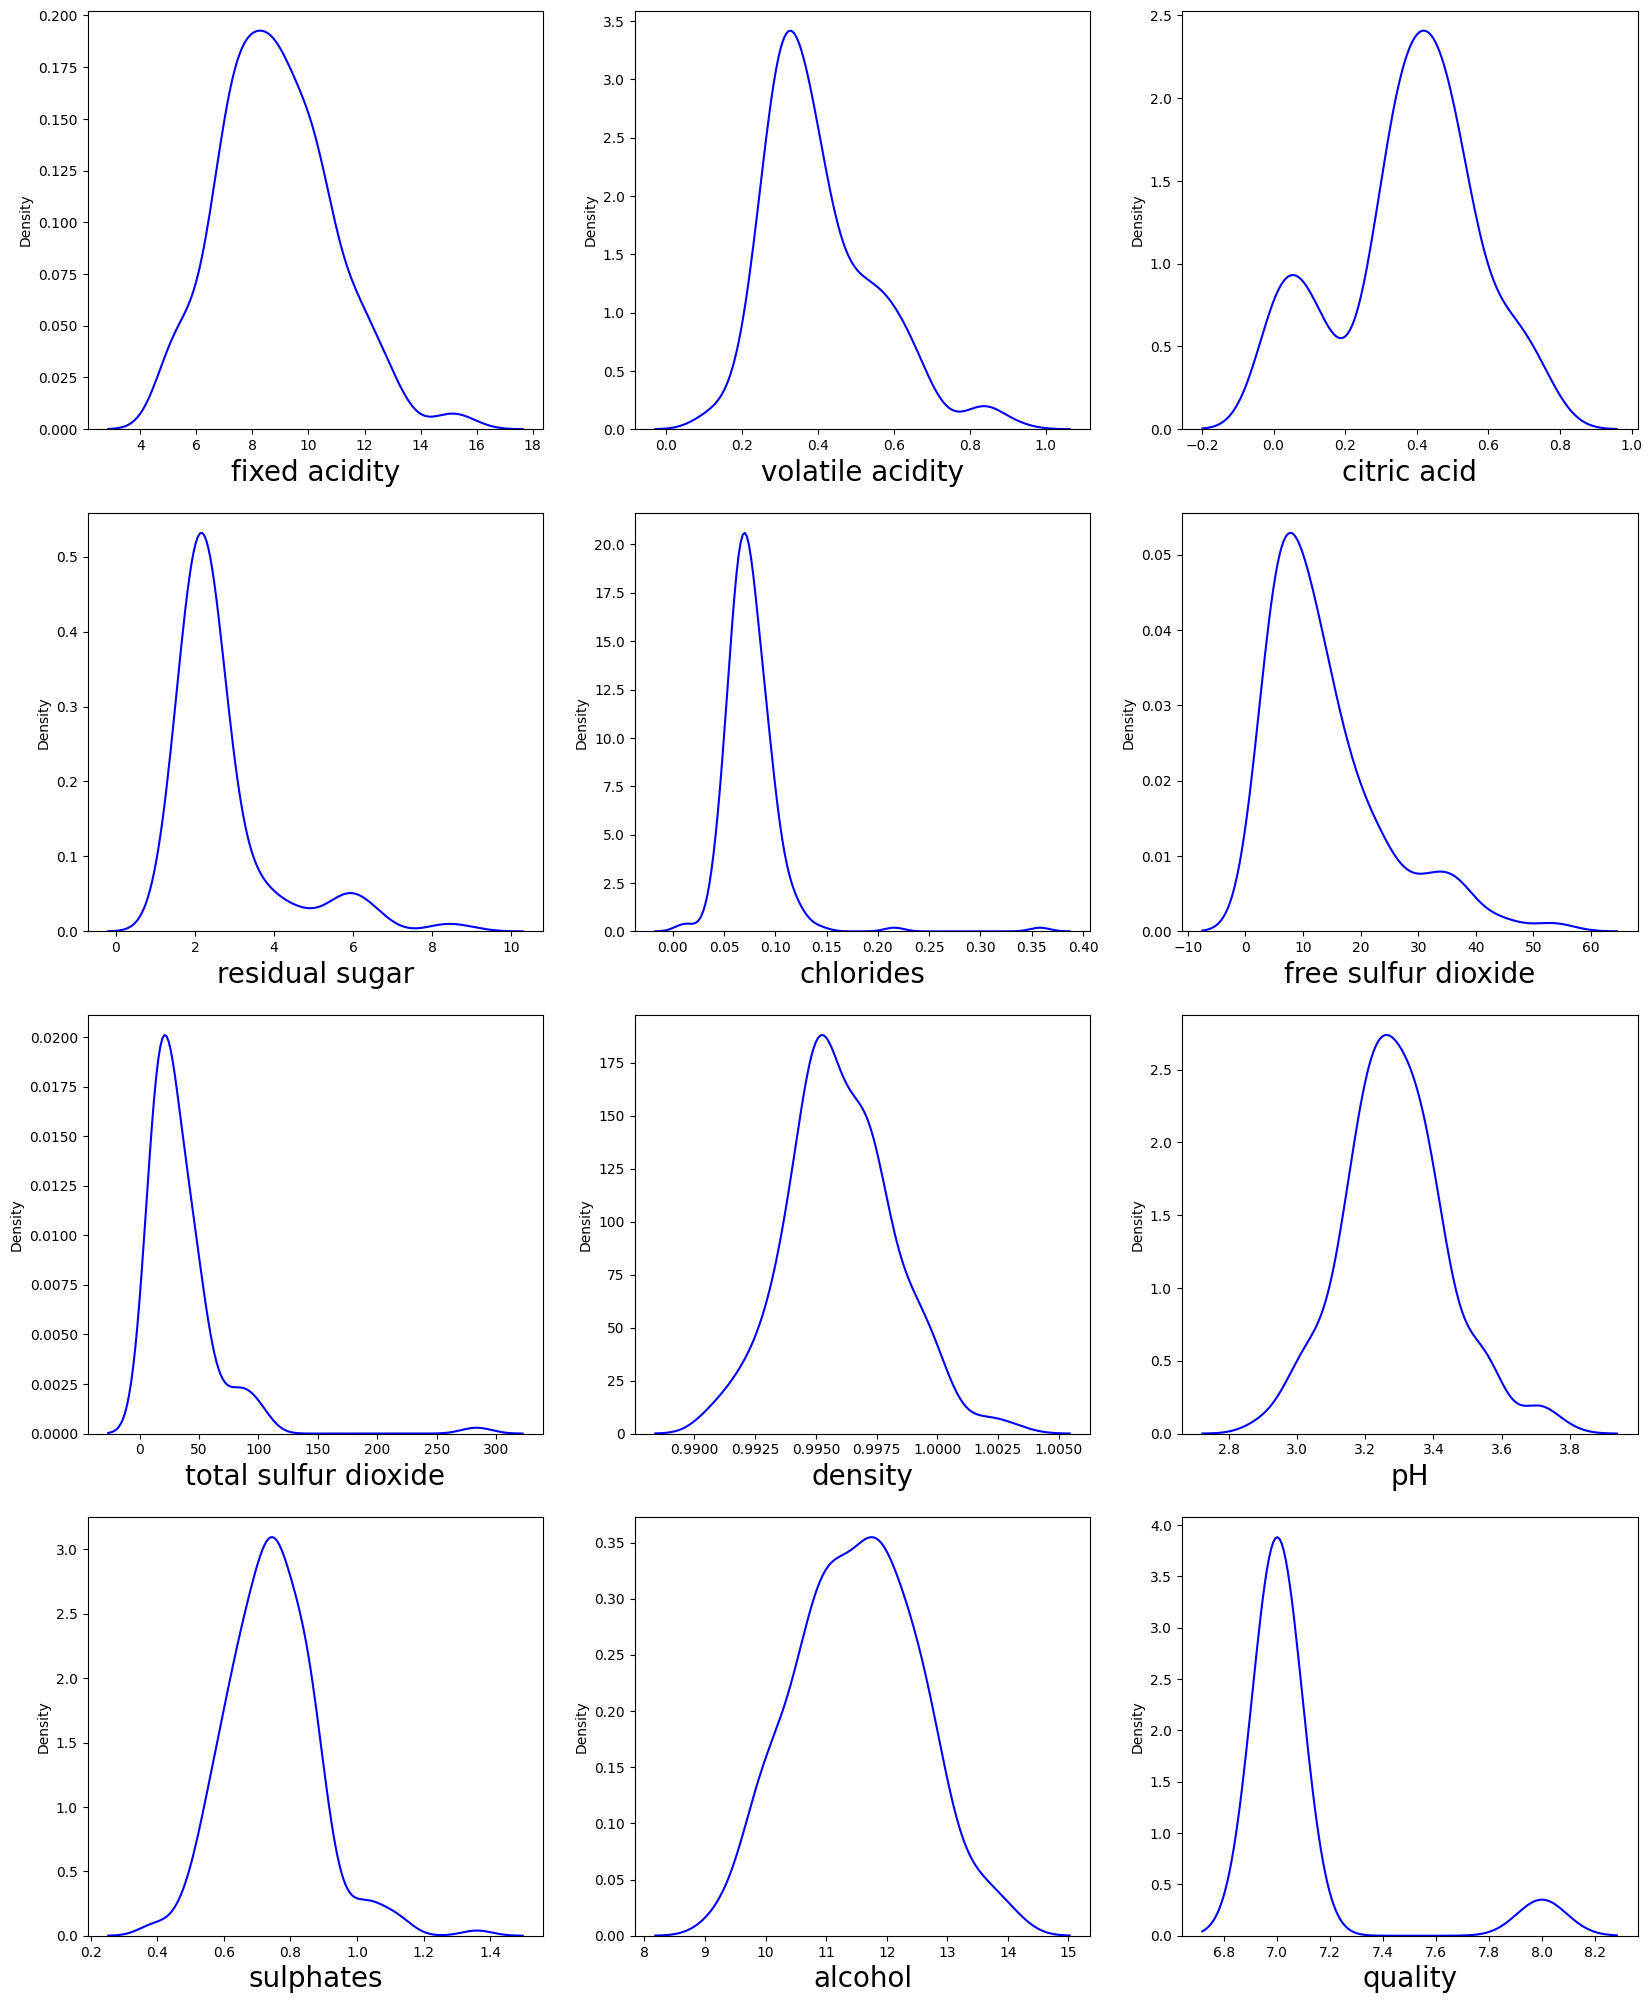

In [ ]:
plt.figure(figsize = (20 ,25) , facecolor = 'white')
plotnumber = 1
for column in C_1:
  if plotnumber <= 12:
    ax = plt.subplot(4 ,3 , plotnumber)
    sns.kdeplot(C_1[column] , color = 'b')
    plt.xlabel(column , fontsize = 20)
  plotnumber += 1
plt.show()

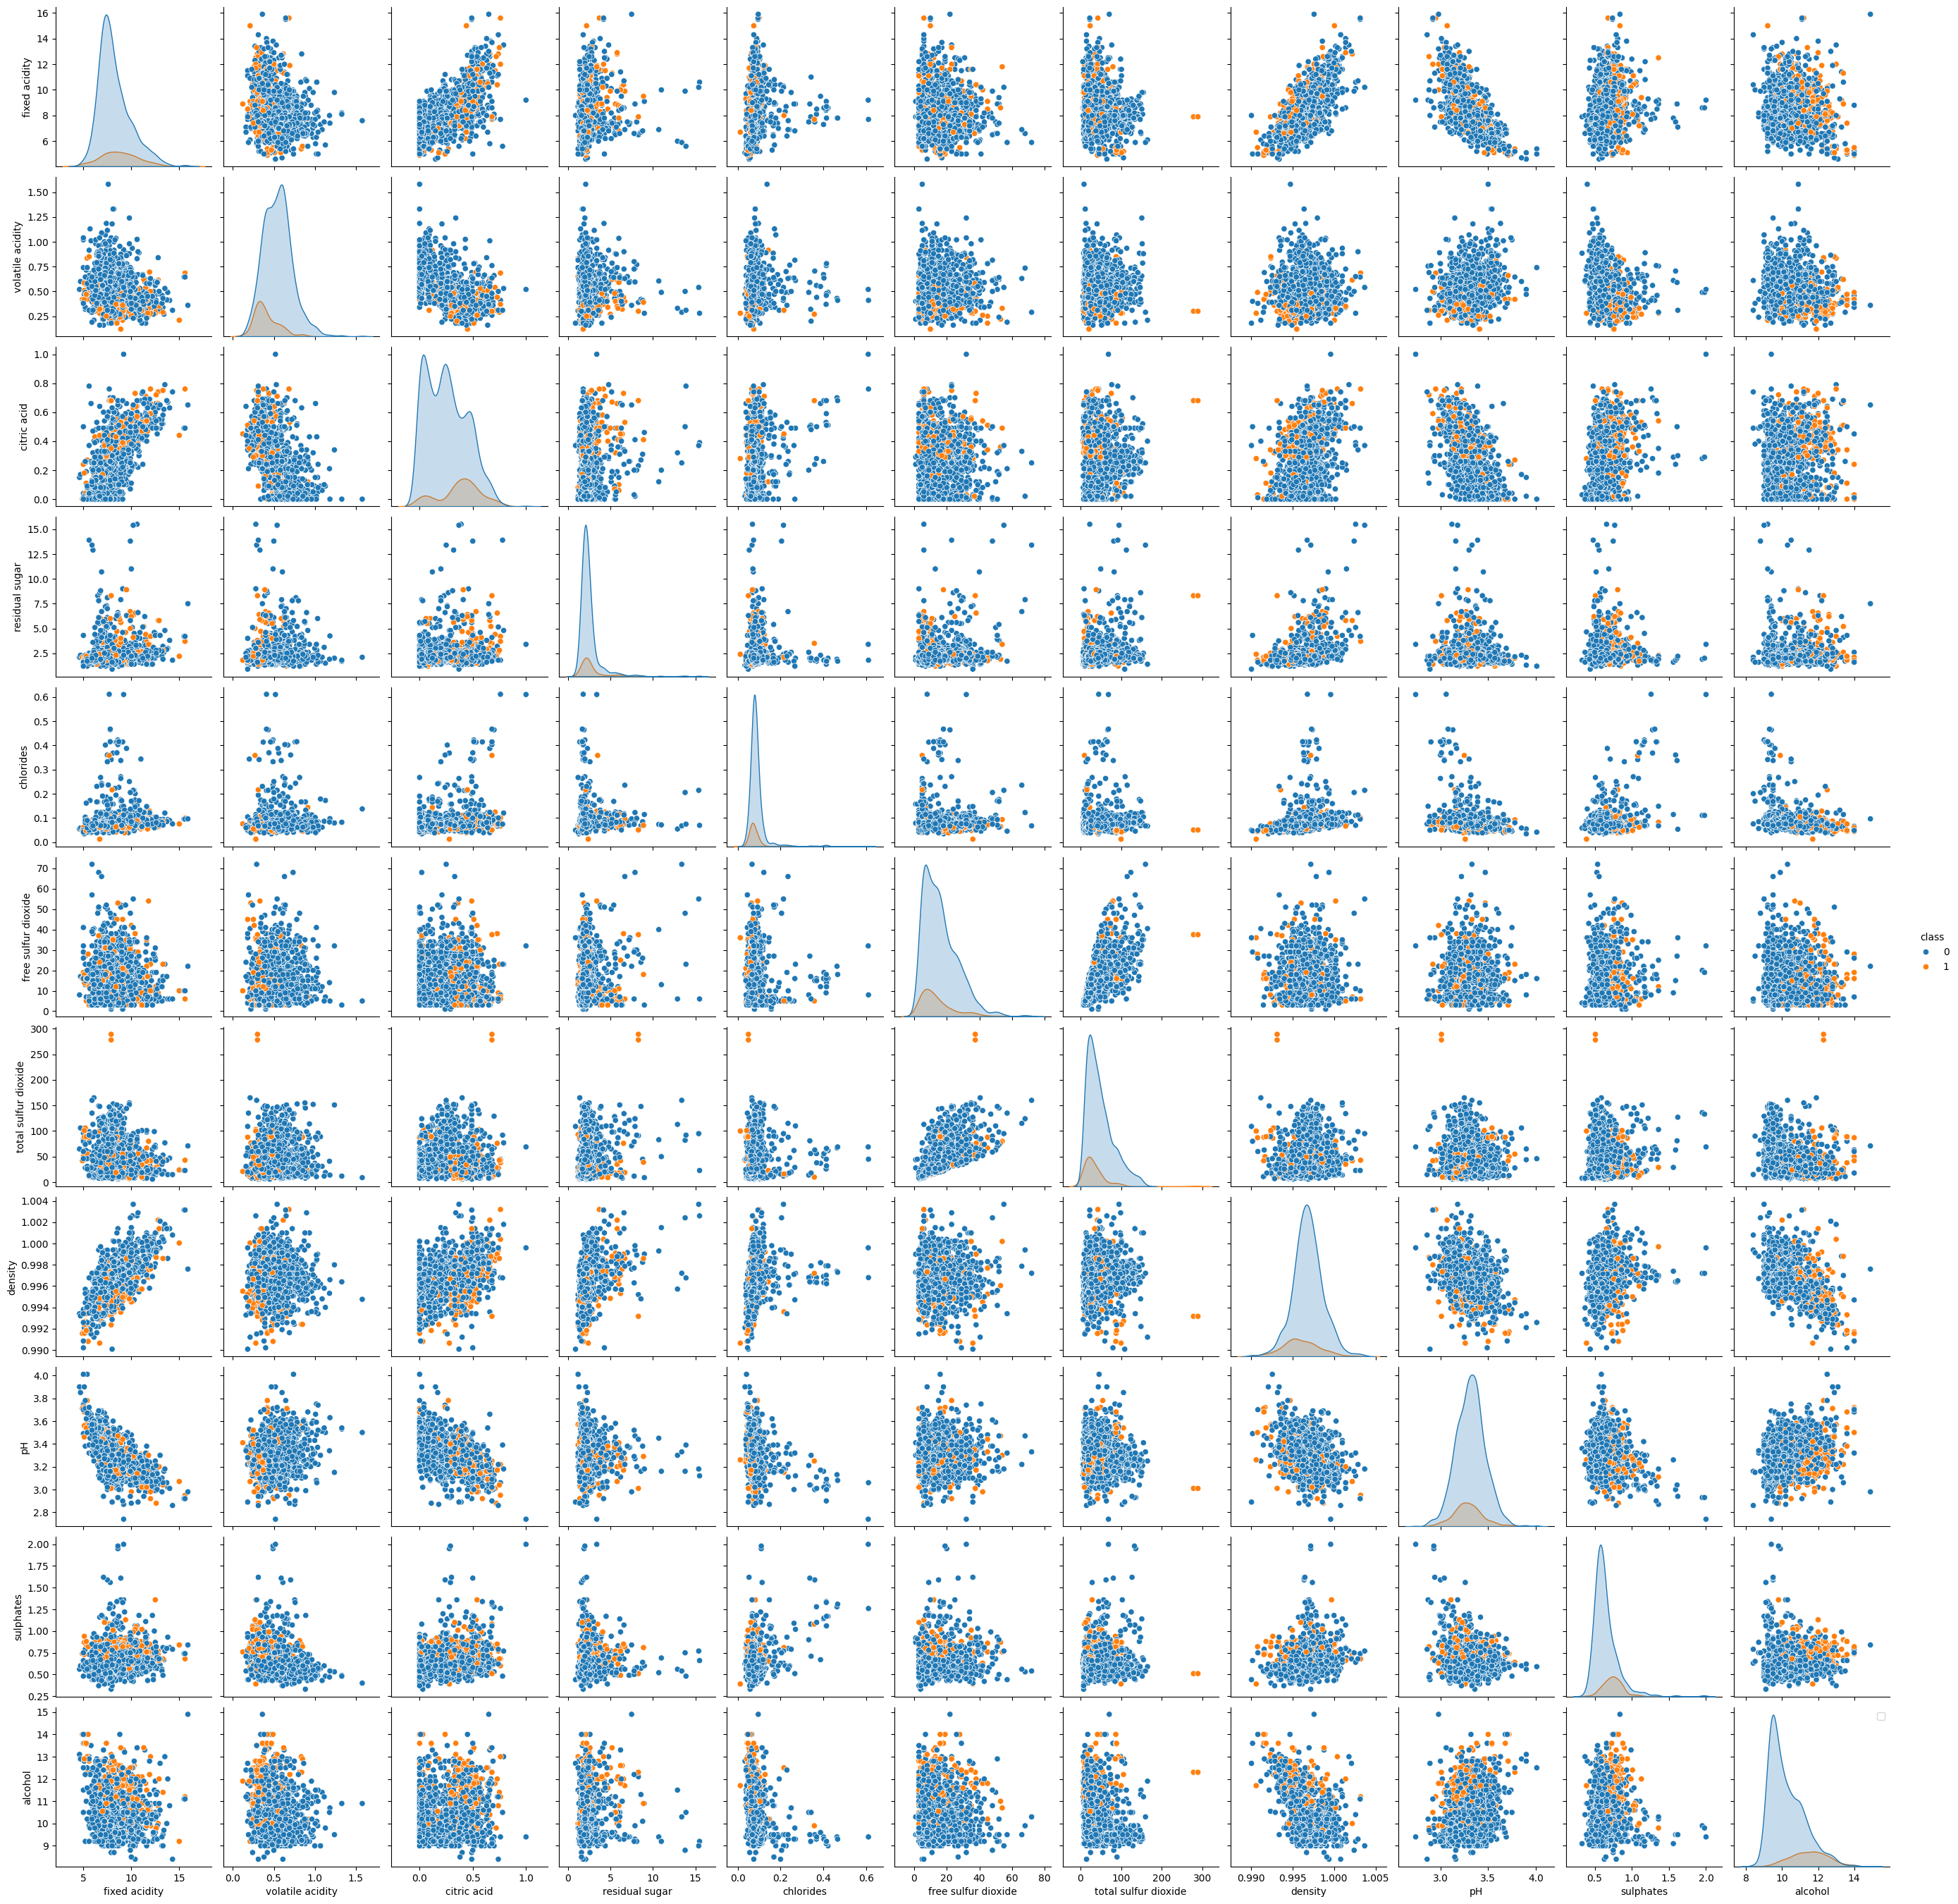

In [ ]:
sns.pairplot(data = df1 , hue = 'class')
plt.legend()
plt.show()

# **Feature Selection**

# **Outliers Detection Based On IQR**

Calculate the IQR:

In [ ]:
df2 = df1.copy()
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
class                    0.000000
dtype: float64


Identify Outliers:

Lower Limit=Q1−1.5×IQR

Upper Limit=Q3+1.5×IQR

Any data points below the Lower Limit or above the Upper Limit are considered potential outliers.

In [ ]:
import pandas as pd

# Assuming df2 is your DataFrame containing the data
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Align df2 with the limits calculated from the IQR
df_new = df2[~((df2 < lower_limit) | (df2 > upper_limit)).any(axis=1)]

print(df_new.shape)


(1047, 12)


Data Loss

In [ ]:
print("\033[1m" + 'Percentage data loss : ' + "\033[0m" , ((1599 - 1047) / 1599) * 100 , '%')

Percentage data loss :  34.52157598499062 %


# Removing Outliers Using Z Score Method

In [ ]:
from scipy.stats import zscore
df3 = df1.copy()
z_score = zscore(df3)
z_score_abs = np.abs(z_score)
df_new = df3[(z_score_abs < 3).all(axis = 1)]
df_new.shape

(1458, 12)

Data Loss

In [ ]:
print("\033[1m" + 'Percentage data loss : ' + "\033[0m" , ((1599 - 1458) / 1599) * 100 , '%')

Percentage data loss :  8.818011257035648 %


# Skewness detection and transformation

In [ ]:

df_new.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
class                   2.103030
dtype: float64

Data is highly skewed. So it need to transform

Transforming positive or right skew data using boxcox transformation

In [ ]:
from scipy.stats import boxcox

In [ ]:
df_new['fixed acidity'] = boxcox(df_new['fixed acidity'] , 0)
df_new['residual sugar'] = boxcox(df_new['residual sugar'] , -1)
df_new['chlorides'] = boxcox(df_new['chlorides'] , -0.5)
df_new['free sulfur dioxide'] = boxcox(df_new['free sulfur dioxide'] , 0)
df_new['total sulfur dioxide'] = boxcox(df_new['total sulfur dioxide'] , 0)
df_new['sulphates'] = boxcox(df_new['sulphates'] , 0)
df_new['alcohol'] = boxcox(df_new['alcohol'] , 0.5)

In [ ]:
df_new.skew()

fixed acidity           0.377100
volatile acidity        0.392097
citric acid             0.292600
residual sugar          0.129444
chlorides              -0.174196
free sulfur dioxide    -0.300264
total sulfur dioxide   -0.095735
density                 0.055543
pH                      0.113039
sulphates               0.345344
alcohol                 0.671764
class                   2.103030
dtype: float64

## Correlation

In [ ]:
df_new.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.295813     0.692400   
volatile acidity          -0.295813          1.000000    -0.589286   
citric acid                0.692400         -0.589286     1.000000   
residual sugar             0.216829          0.039221     0.187498   
chlorides                  0.241177          0.080724     0.100659   
free sulfur dioxide       -0.170132          0.046278    -0.107676   
total sulfur dioxide      -0.096951          0.099221    -0.027290   
density                    0.664021         -0.000446     0.372338   
pH                        -0.721165          0.252900    -0.521270   
sulphates                  0.190975         -0.356126     0.308570   
alcohol                   -0.040923         -0.212962     0.164069   
class                      0.119643         -0.268236     0.226809   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.216829   0.241177            -0.170132   
volatile acidity            0.039221   0.080724             0.046278   
citric acid                 0.187498   0.100659            -0.107676   
residual sugar              1.000000   0.219573             0.034795   
chlorides                   0.219573   1.000000            -0.012947   
free sulfur dioxide         0.034795  -0.012947             1.000000   
total sulfur dioxide        0.126538   0.095544             0.778888   
density                     0.398875   0.414090            -0.041086   
pH                         -0.073404  -0.206719             0.132344   
sulphates                   0.063047  -0.010645             0.045477   
alcohol                     0.152551  -0.280545            -0.092741   
class                       0.073978  -0.144047            -0.095752   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.096951  0.664021 -0.721165   0.190975   
volatile acidity                  0.099221 -0.000446  0.252900  -0.356126   
citric acid                      -0.027290  0.372338 -0.521270   0.308570   
residual sugar                    0.126538  0.398875 -0.073404   0.063047   
chlorides                         0.095544  0.414090 -0.206719  -0.010645   
free sulfur dioxide               0.778888 -0.041086  0.132344   0.045477   
total sulfur dioxide              1.000000  0.140454  0.032708   0.006369   
density                           0.140454  1.000000 -0.311217   0.133096   
pH                                0.032708 -0.311217  1.000000  -0.025521   
sulphates                         0.006369  0.133096 -0.025521   1.000000   
alcohol                          -0.266274 -0.467487  0.137233   0.251575   
class                            -0.183569 -0.154221 -0.079528   0.312522   

                       alcohol     class  
fixed acidity        -0.040923  0.119643  
volatile acidity     -0.212962 -0.268236  
citric acid           0.164069  0.226809  
residual sugar        0.152551  0.073978  
chlorides            -0.280545 -0.144047  
free sulfur dioxide  -0.092741 -0.095752  
total sulfur dioxide -0.266274 -0.183569  
density              -0.467487 -0.154221  
pH                    0.137233 -0.079528  
sulphates             0.251575  0.312522  
alcohol               1.000000  0.429002  
class                 0.429002  1.000000

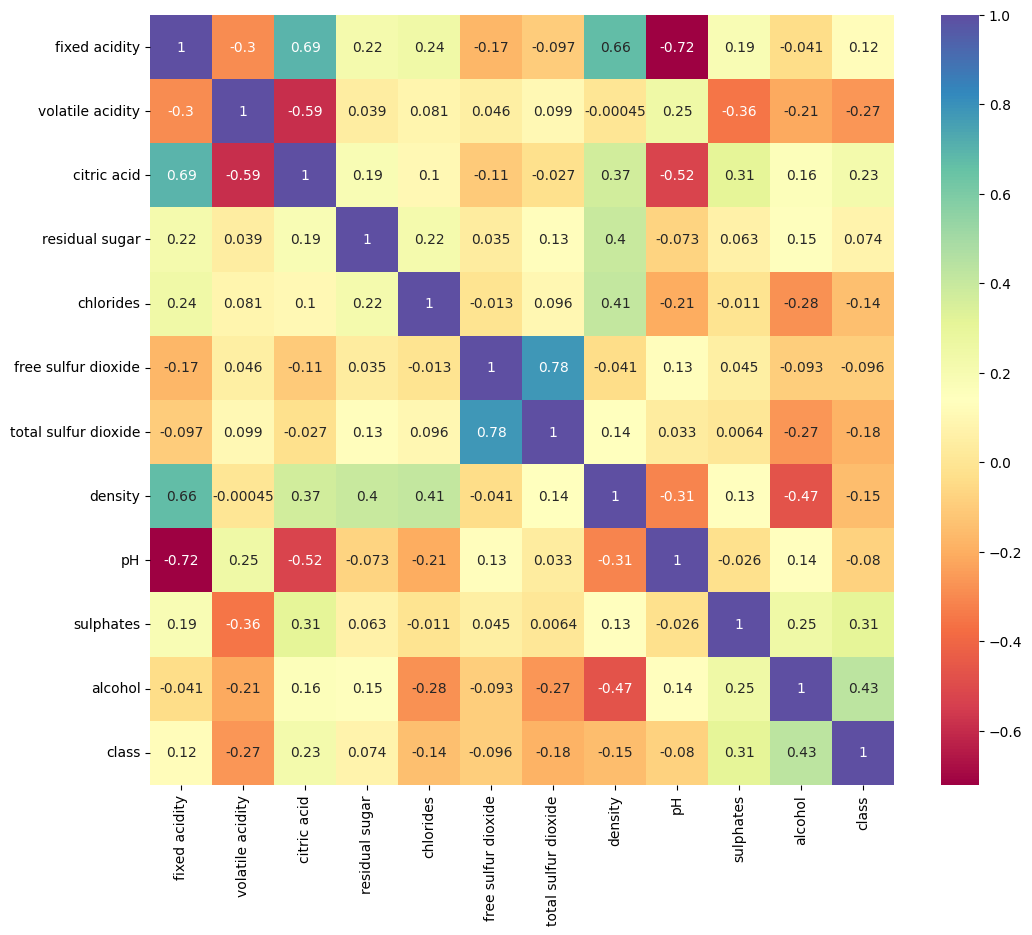

In [ ]:
plt.figure(figsize = (12  ,10))
sns.heatmap(df_new.corr() , annot = True , cmap = 'Spectral')
plt.tight_layout
plt.show()

# Visualizing correlation of feature columns with label column

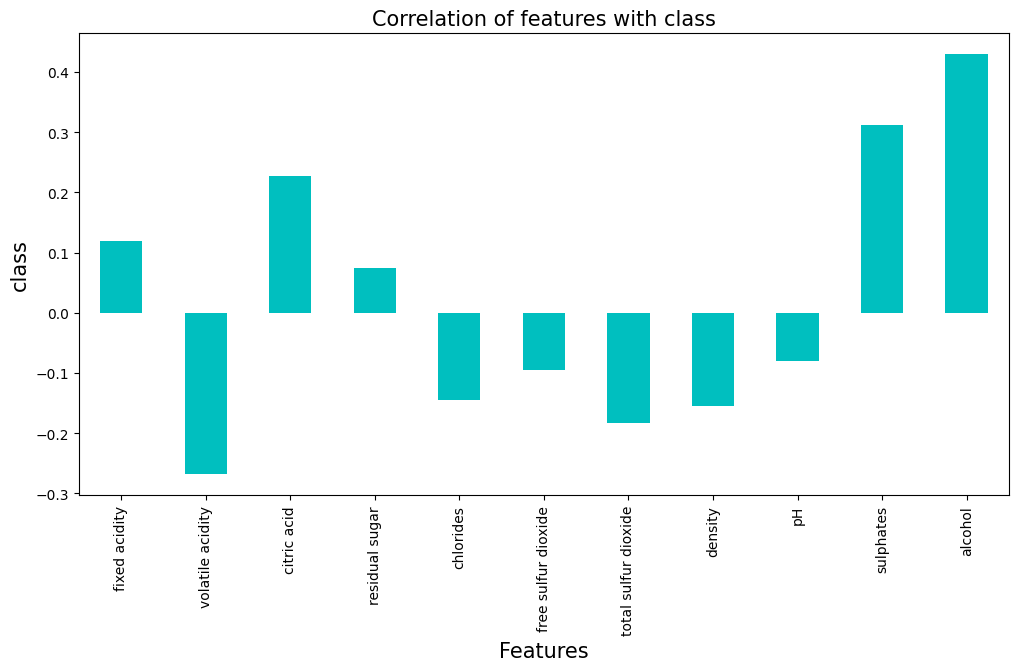

In [ ]:
plt.figure(figsize = (12 ,6))
df_new.corr()['class'].drop(['class']).plot(kind = 'bar' , color = 'c')
plt.xlabel('Features' , fontsize = 15)
plt.ylabel('class' , fontsize = 15)
plt.title('Correlation of features with class' , fontsize = 15)
plt.show()

**Checking Multicollinearity between features using varience_inflation_factor**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df_new2 = df_new.copy()

In [ ]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(df_new2.values , i) for i in range(df_new2.shape[1])]
vif['Features'] = df_new2.columns
vif

vif              Features
0    436.273099         fixed acidity
1     19.153435      volatile acidity
2      8.943895           citric acid
3     28.469532        residual sugar
4     50.774157             chlorides
5     42.932377   free sulfur dioxide
6     88.532862  total sulfur dioxide
7   2925.579563               density
8   1313.485650                    pH
9      8.736626             sulphates
10   326.568734               alcohol
11     1.571169                 class

pH , density are not contributing to label and also high multicollinearity exists. So we will drop density and pH.

In [ ]:
df_new2 = df_new2.drop(['density' , 'pH'] , axis = 1)

In [ ]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(df_new2.values , i) for i in range(df_new2.shape[1])]
vif['Features'] = df_new2.columns
vif

vif              Features
0  138.079146         fixed acidity
1   18.965883      volatile acidity
2    7.709283           citric acid
3   28.137264        residual sugar
4   48.252070             chlorides
5   42.134981   free sulfur dioxide
6   75.794997  total sulfur dioxide
7    8.156504             sulphates
8  161.489884               alcohol
9    1.514541                 class

Still there are lot of multicollinearity . So we nedd to scale data and apply PCA dimentionality reduction technique.

# Standard Scaling

In [ ]:
x = df_new.drop(columns = ['class'])
y = df_new['class']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

In [ ]:
x_scale

array([[-0.51360254,  1.0387081 , -1.38741253, ...,  1.37476832,
        -0.60954326, -1.01374288],
       [-0.23702113,  2.10132549, -1.38741253, ..., -0.82375195,
         0.39246697, -0.59944879],
       [-0.23702113,  1.39291389, -1.17821377, ..., -0.3982319 ,
         0.15960713, -0.59944879],
       ...,
       [-1.35910388, -0.0829436 , -0.70751654, ...,  0.73648824,
         0.89812923,  0.5951066 ],
       [-1.70374108,  0.71401945, -0.75981623, ...,  1.80028837,
         0.6152721 , -0.19352686],
       [-1.61543928, -1.26362959,  1.07067297, ...,  0.52372821,
         0.23840028,  0.5951066 ]])

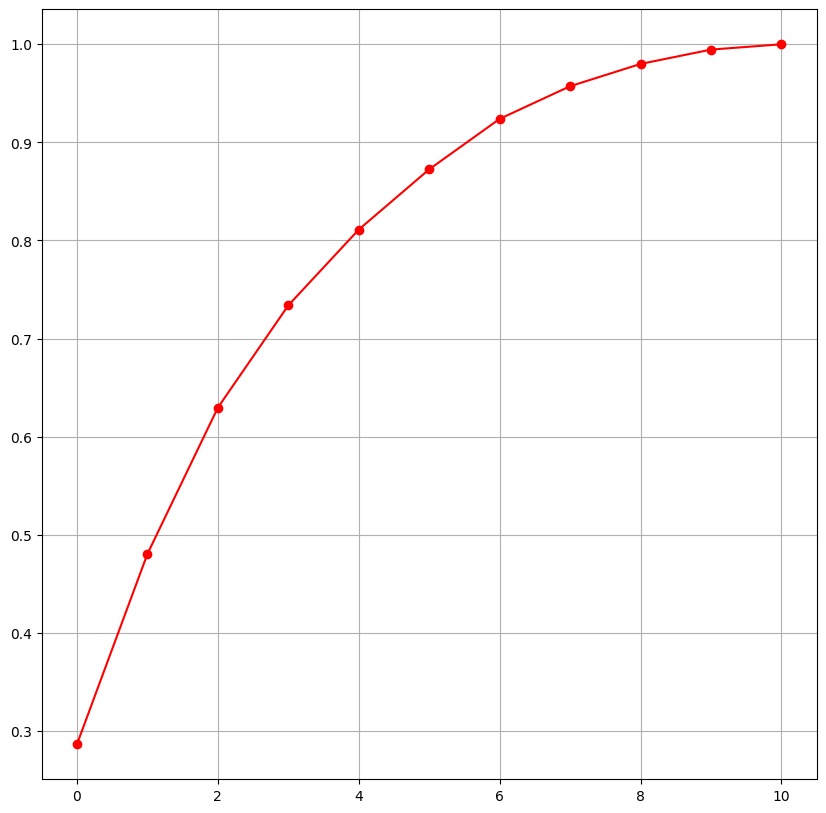

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
# now we plot the graph for the principal component
x_pca = pca.fit_transform(x_scale)
plt.figure(figsize = (10, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_) , 'ro-')
plt.grid()

AS per the graph, we can see that 8 principal components attribute for 90% of variation in the data. We shall pick the first 8 components for our prediction

In [ ]:
pca_new = PCA(n_components =8)
x_new = pca_new.fit_transform(x_scale)
print(x_new)


[[ 1.68462507 -1.1256952   1.19794733 ... -0.82088685 -0.27639344
  -0.50341141]
 [ 0.69036651 -2.3868645   0.1716656  ...  0.25519541  1.86235988
   0.85088565]
 [ 0.62256482 -1.61195042  0.51534596 ...  0.11080193  1.09952821
   0.56539804]
 ...
 [ 1.52818095 -0.03310691 -1.5017168  ...  0.28644269  0.16430362
   0.38505468]
 [ 2.59775352 -0.67376754 -1.16740257 ... -0.0403432  -0.01152306
  -0.2759442 ]
 [ 0.40314029  0.77017235 -1.86030017 ...  0.17662261 -1.56763484
   0.74010434]]


# **Machine Learning Model Building**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report, f1_score

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x_new , y , random_state=42 , test_size=.3)
print('Training feature matrix size:' , x_train.shape)
print('Training target vector size:' , y_train.shape)
print('Test feature matrix size:' , x_test.shape)
print('Test target vector size:' , y_test.shape)

Training feature matrix size: (1020, 8)
Training target vector size: (1020,)
Test feature matrix size: (438, 8)
Test target vector size: (438,)


Finding best random state

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
maxacc = 0
maxRS = 0
for i in range(1 , 250):
  x_train,x_test,y_train,y_test = train_test_split(x_new, y, test_size=0.3 , random_state=1)
  log_reg = LogisticRegression()
  log_reg.fit(x_train , y_train)
  y_pred = log_reg.predict(x_test)
  acc = accuracy_score(y_test , y_pred)
  if acc>maxacc:
    maxacc = acc
    maxRS =i
print('Best accuracy is' , maxacc , 'on random state' , maxRS)

Best accuracy is 0.9041095890410958 on random state 1


# Logistics Regression

In [ ]:
x_train , x_test, y_train , y_test = train_test_split(x_new , y , random_state=133 , test_size=.33)
log_reg = LogisticRegression()
log_reg.fit(x_train , y_train)
y_pred = log_reg.predict(x_test)
print('\033[1m' + 'Logistic Regression Evaluation' + '\033[0m')
print('\n')
print('\033[1m' + 'Accuract score of Logistic Regression' + '\033[0m' , accuracy_score(y_test , y_pred))
print('\n')
print('\033[1m' + 'Confusion Matrix of Logistic Regression ' + '\033[0m' , confusion_matrix(y_test , y_pred))
print('\n')
print('\033[1m' + 'classification report of Logistic Regression' + '\033[0m' , classification_report(y_test , y_pred))

Logistic Regression Evaluation


Accuract score of Logistic Regression 0.9149377593360996


Confusion Matrix of Logistic Regression  [[421   9]
 [ 32  20]]


classification report of Logistic Regression               precision    recall  f1-score   support

           0       0.93      0.98      0.95       430
           1       0.69      0.38      0.49        52

    accuracy                           0.91       482
   macro avg       0.81      0.68      0.72       482
weighted avg       0.90      0.91      0.90       482



# Finding Optimal value of n_neighbors for KNN

In [ ]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = []  # to store rmse for different k
for k in range(20):
  k = k+1
  model = neighbors.KNeighborsClassifier(n_neighbors=k)

  model.fit(x_train , y_train)
  y_pred = model.predict(x_test)
  error = sqrt(mean_squared_error(y_test , y_pred))
  rmse_val.append(error)
  print('RMSE value for k = ' , k , 'is :' , error)

RMSE value for k =  1 is : 0.3528191148461629
RMSE value for k =  2 is : 0.30555031639751645
RMSE value for k =  3 is : 0.3408556477661884
RMSE value for k =  4 is : 0.31884126307199384
RMSE value for k =  5 is : 0.33159991891444485
RMSE value for k =  6 is : 0.32207831320041547
RMSE value for k =  7 is : 0.32528315147069237
RMSE value for k =  8 is : 0.31226651028245633
RMSE value for k =  9 is : 0.3155710098229302
RMSE value for k =  10 is : 0.30555031639751645
RMSE value for k =  11 is : 0.31226651028245633
RMSE value for k =  12 is : 0.29868314022934306
RMSE value for k =  13 is : 0.3089266654843879
RMSE value for k =  14 is : 0.302136239226515
RMSE value for k =  15 is : 0.31884126307199384
RMSE value for k =  16 is : 0.302136239226515
RMSE value for k =  17 is : 0.30555031639751645
RMSE value for k =  18 is : 0.31884126307199384
RMSE value for k =  19 is : 0.3155710098229302
RMSE value for k =  20 is : 0.3155710098229302


<Axes: >

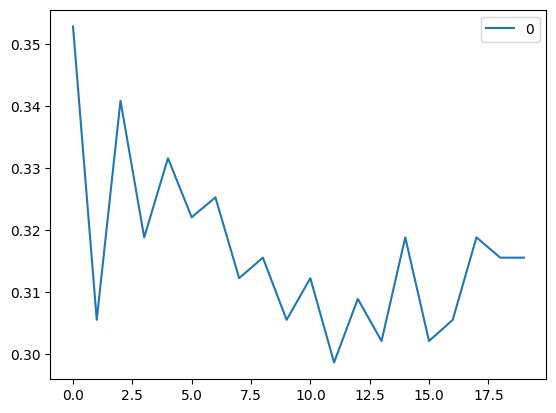

In [ ]:
# plotting the rmse value for the k value

curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

Comment-

At k= 12, the RMSE is approximately 0.29868314022934306, and shoots up on further increasing the k value. We can safely say that k=12 will give us the best result in this case

In [ ]:
model = [
      SVC(),
      GaussianNB(),
      DecisionTreeClassifier(),
      KNeighborsClassifier(n_neighbors=12),
      RandomForestClassifier(),
      AdaBoostClassifier(),
      GradientBoostingClassifier(),
      BaggingClassifier()
]

for m in model:
  m.fit(x_train , y_train)
  y_pred = m.predict(x_test)
  print('\033[1m' + 'Classification ML Algorithm Evaluation Matrix' , m , 'is' + '\033[0m')
  print('\n')
  print('\033[1m' + 'Accuracy Score' + '\033[0m\n' , accuracy_score(y_test , y_pred))
  print('\n')
  print('\033[1m' + 'Confusion Matrix' + '\033[0m\n' , confusion_matrix(y_test , y_pred))
  print('\n')
  print('\033[1m' + 'Classification Report' + '\033[0m\n' , classification_report(y_test , y_pred))
  print('\n')
  print('==================================================================')

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score
 0.9087136929460581


Confusion Matrix
 [[419  11]
 [ 33  19]]


Classification Report
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       430
           1       0.63      0.37      0.46        52

    accuracy                           0.91       482
   macro avg       0.78      0.67      0.71       482
weighted avg       0.90      0.91      0.90       482



Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score
 0.9087136929460581


Confusion Matrix
 [[417  13]
 [ 31  21]]


Classification Report
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       430
           1       0.62      0.40      0.49        52

    accuracy                           0.91       482
   macro avg       0.77      0.69      0.72       482
weighted avg       0.90      0.91      0.90       482



Classification 

We can see that RandomForestClassifier() gives maximum Accuracy so we will continue further investigation with crossvalidation of above model

# **CrossValidation**

In [ ]:
from sklearn.model_selection import cross_val_score
model = [
    SVC(),
      GaussianNB(),
      DecisionTreeClassifier(),
      KNeighborsClassifier(n_neighbors=12),
      RandomForestClassifier(),
      AdaBoostClassifier(),
      GradientBoostingClassifier(),
      BaggingClassifier()
]
for m in model:
  score = cross_val_score(m ,x, y ,cv =5)
  print('\n')
  print('\033[1m' + 'cross validation score' , m , ':' + '\033[0m\n')
  print("score :" , score)
  print("Mean score : " , score.mean())
  print('std deviation: ' ,score.std())
  print('\n')
  print('=================================================')



cross validation score SVC() :

score : [0.8630137  0.8630137  0.85958904 0.86254296 0.86254296]
Mean score :  0.8621404698018171
std deviation:  0.0012929682756927664




cross validation score GaussianNB() :

score : [0.89383562 0.74657534 0.8869863  0.74570447 0.87285223]
Mean score :  0.8291907922609802
std deviation:  0.06814818357660132




cross validation score DecisionTreeClassifier() :

score : [0.85958904 0.82534247 0.85616438 0.75257732 0.80756014]
Mean score :  0.8202466694911266
std deviation:  0.03899733462302111




cross validation score KNeighborsClassifier(n_neighbors=12) :

score : [0.86986301 0.83219178 0.88013699 0.85223368 0.83161512]
Mean score :  0.8532081156145553
std deviation:  0.01955220198940522




cross validation score RandomForestClassifier() :

score : [0.89383562 0.84931507 0.87328767 0.86597938 0.86941581]
Mean score :  0.8703667090335641
std deviation:  0.014301370992906686




cross validation score AdaBoostClassifier() :

score : [0.88013699 0.

we can see that Random Forest Classifier gives maximum Accuracy. So we will apply Hyperparameter tuning on Random Forest model

# **Hyper Parameter Tuning: GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameter = {'n_estimators': [30 ,50 , 60] , 'max_depth' : [10, 20, 40, 60, 80],
             'criterion' : ['gini' , 'entropy'] , 'max_features' : ["auto" , "sqrt" , "log2"]}

In [ ]:
GCV = GridSearchCV(RandomForestClassifier() , parameter , cv = 5 , n_jobs=-1)
GCV.fit(x_train , y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40, 60, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [30, 50, 60]})

In [ ]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 'sqrt',
 'n_estimators': 60}

# Final Model

In [ ]:
Final_mod = RandomForestClassifier(criterion='entropy' , n_estimators=50 , max_depth=20 , max_features='sqrt')
Final_mod.fit(x_train , y_train)
y_pred = Final_mod.predict(x_test)
print('\033[1m' + 'Accuracy score:' + '\033[0m\n' , accuracy_score(y_test , y_pred))

Accuracy score:
 0.9253112033195021


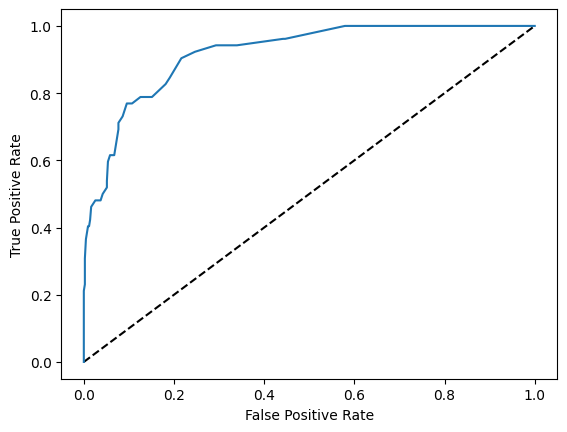

Auc score :
 0.7045617173524151


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = Final_mod.predict_proba(x_test)[: , 1]
fpr , tpr , thresholds = roc_curve(y_test , y_pred_prob)
plt.plot([0 ,1] , [0,1] , 'k--')
plt.plot(fpr , tpr , label = 'Rndom Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
auc_score = roc_auc_score(y_test , Final_mod.predict(x_test))
print('\033[1m' + 'Auc score :' + '\033[0m\n' , auc_score)